# Numpy

In [1]:
import numpy as np

a = np.array([1, 2, 3])  # Create a rank 1 array
print type(a)            # Prints "<type 'numpy.ndarray'>"
print a.shape            # Prints "(3,)"
print a[0], a[1], a[2]   # Prints "1 2 3"
a[0] = 5                 # Change an element of the array
print a                  # Prints "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print b.shape                     # Prints "(2, 3)"
print b[0, 0], b[0, 1], b[1, 0]   # Prints "1 2 4"

<type 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]
(2, 3)
1 2 4


In [2]:
#matrix inverse
from numpy.linalg import inv
a = np.array([[1., 2.], [3., 4.]])
ainv = inv(a)
ainv

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

![title](pics/Linear.png)
![title](pics/linear2.png)

## data set: iris
![title](pics/iris.png)


In [3]:
from sklearn import datasets
iris=datasets.load_iris()

In [19]:
from sklearn import datasets
iris=datasets.load_iris()
#sepal length,sepal width,petal length,petal width
print iris.data.shape
Y=iris.data[:,0]
X=iris.data[:,1:5]
print Y.shape
print X.shape

(150, 4)
(150,)
(150, 3)


In [23]:
from numpy.linalg import inv

#Excersice : Linear regression

# acctually how to perform a linear regression(estimate beta) is just
# B=(X'X)^-1X'Y

print B

[ 1.12303717  0.9258731  -0.9058349 ]


In [41]:
#check the answer

from sklearn import  linear_model
regr = linear_model.LinearRegression(fit_intercept=False)
# Train the model using the training sets
regr.fit(X, Y)
# The coefficients
print('Coefficients: \n', regr.coef_)

print "r^2 :" +str(regr.score(X, Y))

#https://dl.sciencesocieties.org/images/publications/jeq/39/1/220equ1.jpeg

('Coefficients: \n', array([ 1.12303717,  0.9258731 , -0.9058349 ]))
r^2 :0.806871905246


## boardcast

In [6]:
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)

In [7]:
v+w

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [8]:
#1,2
#3,1 -> 3,2
print np.reshape(v, (3, 1)) + w

[[5 6]
 [6 7]
 [7 8]]


# OpenCV

In [9]:
import numpy as np
import cv2 
# Create a black image 
img = np.zeros((512,512,3), np.uint8) 
# Write some Text
font = cv2.FONT_HERSHEY_SIMPLEX 
cv2.putText(img,'Hello World!',(10,500), font, 1,(255,255,255),2)
#Display the image 
#cv2.imshow("img",img)
#cv2.waitKey(0)
#Save image
cv2.imwrite("pics/out.jpg", img)

True

(313, 1011, 3)
<type 'numpy.ndarray'>


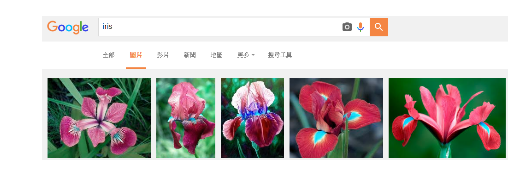

In [1]:
import matplotlib.pyplot as plt
import cv2

image = cv2.imread("pics/iris.png")
print image.shape
print type(image)

%matplotlib inline
plt.axis("off")
plt.imshow(image)


In [2]:
image[1:3,1:3]

array([[[241, 241, 241],
        [241, 241, 241]],

       [[241, 241, 241],
        [241, 241, 241]]], dtype=uint8)

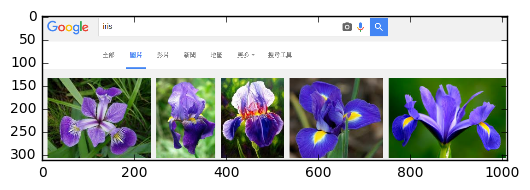

In [3]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

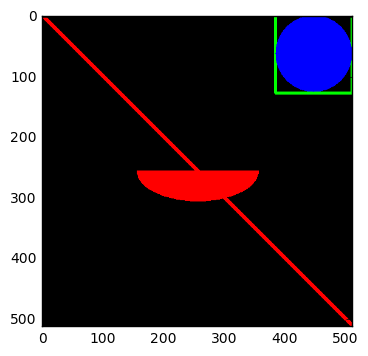

In [4]:
import numpy as np

# Create a black image 
img = np.zeros((512,512,3), np.uint8) 
# Draw a diagonal blue line with thickness of 5 px
cv2.line(img,(0,0),(511,511),(255,0,0),5)
cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)
cv2.circle(img,(447,63), 63, (0,0,255), -1)
cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)

plt.imshow(img)

In [9]:
# read image
img = cv2.imread("pics/cv2.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# load face detect model
cascPath = "../minimum_django/haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.cv.CV_HAAR_SCALE_IMAGE
)
print "found :"+str(len(faces))+"faces"

found :4faces


In [10]:
faces

array([[ 99,  71,  63,  63],
       [175, 128,  67,  67],
       [239,  50,  67,  67],
       [327, 115,  73,  73]], dtype=int32)

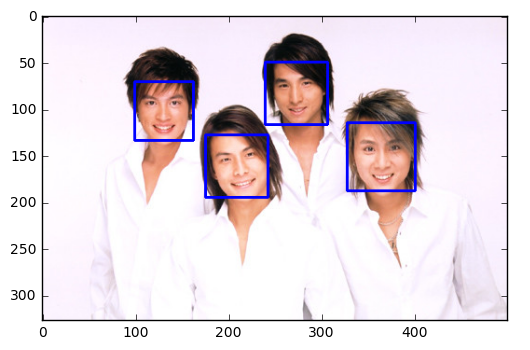

In [11]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
#Excercise : Do something on the above image (img) and save it
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# Scikit_Learn

## knn

In [56]:
# a simple demo using sklearn 
#https://www.youtube.com/watch?v=EvV99YhSsJU&index=5&list=PLXO45tsB95cI7ZleLM5i3XXhhe9YmVrRO
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets


iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

##print(iris_X[:2, :])
##print(iris_y)

X_train, X_test, y_train, y_test = train_test_split(
    iris_X, iris_y, test_size=0.8)


In [63]:
##print(y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print "correct :"+str(sum(knn.predict(X_test)==y_test))+" , n : "+str(len(y_test))
print("accuracy :"+ str(sum(knn.predict(X_test)==y_test)/float(len(y_test))) )

correct :116 , n : 120
accuracy :0.966666666667


In [60]:
from sklearn import svm
linear_svc = svm.SVC()
linear_svc.fit(X_train, y_train) 
print "correct :"+str(sum(linear_svc.predict(X_test)==y_test))+" , n : "+str(len(y_test))
print("accuracy :"+ str(sum(linear_svc.predict(X_test)==y_test)/float(len(y_test))) )


correct :114 , n : 120
accuracy :0.95


In [65]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1000)
logreg.fit(X_train, y_train) 
print "correct :"+str(sum(logreg.predict(X_test)==y_test))+" , n : "+str(len(y_test))
print("accuracy :"+ str(sum(logreg.predict(X_test)==y_test)/float(len(y_test))) )


correct :112 , n : 120
accuracy :0.933333333333
